<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/Furkan_Onat_LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [0]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [0]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [7]:
df.head()

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,1/18/2016,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,California,1/24/2016,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Carnitas,1/24/2016,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Asada,1/24/2016,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,California,1/27/2016,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [0]:
# Begin train/validate/test split
# Train / test split
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [0]:
train = df[df['Date'].dt.year <= 2016]
test = df[df['Date'].dt.year >= 2018]

In [10]:
train.shape, test.shape

((298, 59), (38, 59))

In [11]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=30)
print('Shape of train & validate data:', train.shape, val.shape)
from sklearn.model_selection import train_test_split



Shape of train & validate data: (223, 59) (75, 59)


In [12]:
# Majority case baseline = most common class in training set
target = 'Great'
y_train = train[target]
y_train.value_counts(normalize=True)


False    0.596413
True     0.403587
Name: Great, dtype: float64

In [13]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
y_pred

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [14]:
# Accuracy score of model with majority class

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)


0.5964125560538116

In [15]:
#using linear regression
train.describe(include='all')

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
count,223,223,53.000000,53.000000,17,220.000000,222.000000,0.0,0.0,129.000000,128.000000,128.000000,223.000000,212.000000,215.000000,222.000000,218.000000,221.000000,207.000000,222.000000,221.000000,16,4,125,108,104,106,82,64,33,15,11,4,29,27,7,6,7,1,6,26,4,11,13,3,2,0,3,4,1,0.0,4,3,3,0,8,2,1,223
unique,5,102,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,0,1,1,1,NaN,1,1,1,0,1,2,1,2
top,Other,2016-08-30 00:00:00,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,X,x,x,x,x,x,x,x,x,x,X,x,x,x,x,x,x,x,x,x,x,X,x,x,NaN,x,x,x,NaN,x,x,x,NaN,x,X,x,False
freq,84,23,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,2,97,89,78,86,68,49,24,14,10,2,21,20,6,4,4,1,4,24,3,6,7,2,2,NaN,3,4,1,NaN,4,3,3,NaN,8,1,1,133
first,NaN,2011-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-12-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.900000,4.141509,NaN,6.782091,3.471396,NaN,NaN,19.843256,21.945117,0.765391,3.463004,3.728302,3.537907,3.479505,3.551743,3.425339,3.303382,3.481532,3.964253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.514408,0.387017,NaN,1.134560,0.902500,NaN,NaN,2.144686,1.775395,0.144962,0.826605,0.979095,0.854943,0.849725,1.039429,1.085018,0.972692,0.953321,1.129778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.500000,2.900000,NaN,2.990000,0.500000,NaN,NaN,15.000000,17.000000,0.400000,1.400000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.500000,4.000000,NaN,6.250000,3.000000,NaN,NaN,18.500000,20.950000,0.650000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 287 to 296
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Burrito         223 non-null    object        
 1   Date            223 non-null    datetime64[ns]
 2   Yelp            53 non-null     float64       
 3   Google          53 non-null     float64       
 4   Chips           17 non-null     object        
 5   Cost            220 non-null    float64       
 6   Hunger          222 non-null    float64       
 7   Mass (g)        0 non-null      float64       
 8   Density (g/mL)  0 non-null      float64       
 9   Length          129 non-null    float64       
 10  Circum          128 non-null    float64       
 11  Volume          128 non-null    float64       
 12  Tortilla        223 non-null    float64       
 13  Temp            212 non-null    float64       
 14  Meat            215 non-null    float64       
 15  Fill

# Linear Regression

In [17]:
# Import estimator class
from sklearn.linear_model import LinearRegression

# Instantiate the class
linear_reg = LinearRegression()

# Arrange X feature matrices
features = ['Cost', 'Hunger', 'Fillings']
X_train = train[features]
X_val = val[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Fit the model
linear_reg.fit(X_train_imputed, y_train)

# Apply the model to new data
linear_reg.predict(X_val_imputed)

array([ 0.05413649,  0.42865826,  0.05262135,  0.59730357,  0.22349842,
        0.15960115,  0.582353  ,  0.22308892,  0.28251048,  0.77084238,
        0.39765147,  0.22155331,  0.76969578,  0.93535176,  0.39683248,
       -0.08323585,  0.57979364,  0.37817595,  0.06787905,  0.39281784,
        0.36230401,  0.94284557, -0.14334371,  0.41454716,  0.58100166,
        0.24935382,  0.08547088,  0.25739217,  0.73787   ,  0.24149975,
        0.80779739,  0.05393174,  0.39302415,  0.20650036,  0.97325859,
        0.58644798,  0.57168168,  0.75617845,  0.77033051,  0.56811905,
        0.07197402,  0.22380554,  0.58429811,  0.97807018,  0.91007794,
        0.58427764,  0.06951704,  0.94212895,  0.92367717,  0.24152023,
        0.3638601 ,  0.41045218,  0.58245537,  0.23740478,  0.25839544,
        0.57569475,  0.7799537 ,  0.3935565 ,  0.58091976,  0.56474069,
        0.9074981 ,  0.41659465,  0.93984004,  0.23855137,  0.65019624,
        0.77420104,  0.20873212,  0.02446057,  0.59853207, -0.11

In [18]:
# Coefficients
pd.Series(linear_reg.coef_, features)

Cost        0.002047
Hunger      0.033791
Fillings    0.340935
dtype: float64

In [19]:
test_case = [[10, 3.5, 5]]  # High cost, Median Hunger, High Fillings
linear_reg.predict(test_case)

array([0.92953298])

# Logistic Regression

In [20]:
features = ['Burrito', 'Cost', 'Hunger', 'Fillings', 'Cheese']
target = 'Great'

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
X_train.head()

,Burrito,Cost,Hunger,Fillings,Cheese
287,California,7.90,3.5,4.0,NaN
201,Surf & Turf,8.25,4.0,3.0,x
165,Asada,6.25,3.0,3.0,x
216,California,7.50,3.0,4.0,x
86,California,7.49,1.0,4.5,x


In [22]:
# Encoding with OneHotEncoder 
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)


encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)

X_val_encoded = encoder.transform(X_val)

X_train_encoded.head()


,Burrito_California,Burrito_Surf & Turf,Burrito_Asada,Burrito_Other,Burrito_Carnitas,Cost,Hunger,Fillings,Cheese_nan,Cheese_x,Cheese_X
287,1,0,0,0,0,7.90,3.5,4.0,1,0,0
201,0,1,0,0,0,8.25,4.0,3.0,0,1,0
165,0,0,1,0,0,6.25,3.0,3.0,0,1,0
216,1,0,0,0,0,7.50,3.0,4.0,0,1,0
86,1,0,0,0,0,7.49,1.0,4.5,0,1,0


In [23]:
encoder.get_params()

{'cols': ['Burrito', 'Cheese'],
 'drop_invariant': False,
 'handle_missing': 'value',
 'handle_unknown': 'value',
 'return_df': True,
 'use_cat_names': True,
 'verbose': 0}

In [24]:
# Imputing for the Nan values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

imputer.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'missing_values': nan,
 'strategy': 'mean',
 'verbose': 0}

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Accuracy score for the validation 
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)


0.76

In [27]:
coefficients = (model.coef_[0], X_train_encoded.columns)
coefficients

(array([ 0.26455325, -0.18734785,  0.07418951, -0.2906251 ,  0.14679581,
         0.25735267,  0.20383432,  2.01959474,  0.17518511,  0.02482892,
        -0.34847876]),
 Index(['Burrito_California', 'Burrito_Surf & Turf', 'Burrito_Asada',
        'Burrito_Other', 'Burrito_Carnitas', 'Cost', 'Hunger', 'Fillings',
        'Cheese_nan', 'Cheese_x', 'Cheese_X'],
       dtype='object'))

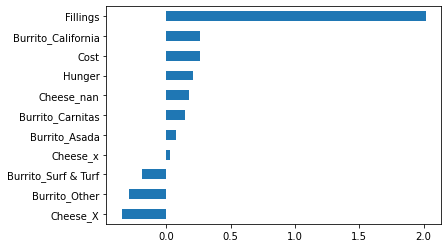

In [28]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();